In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [23]:
#load data set in a dataframe
digit = load_digits(return_X_y = True, as_frame= True)
digit[0].shape

(1797, 64)

In [25]:
digit[1].shape

(1797,)

In [31]:
#to load data set in the form of ndarray
digit = load_digits()
X, y = digit.data, digit.target

<Figure size 640x480 with 0 Axes>

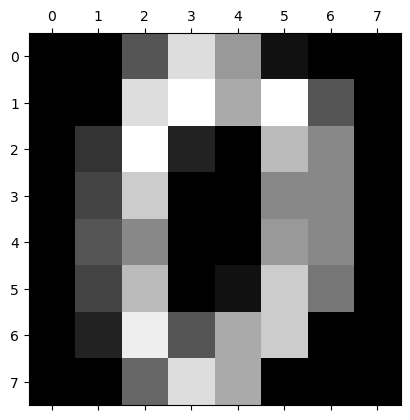

In [33]:
plt.gray()
plt.matshow(digit.images[0])
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
from sklearn.ensemble import BaggingClassifier

In [47]:
dc = DecisionTreeClassifier()
model = BaggingClassifier(estimator= dc, n_estimators= 10)
classifiers = model.fit(X_train, y_train)

In [49]:
y_pred = model.predict(X_test)

In [53]:
print(accuracy_score(y_test, y_pred))

0.9277777777777778


In [59]:
for i,clf in enumerate(classifiers):
    y_pred = clf.predict(X_test)
    print("accuracy score of ",i+1, "is", accuracy_score(y_test, y_pred))

accuracy score of  1 is 0.8388888888888889
accuracy score of  2 is 0.8222222222222222
accuracy score of  3 is 0.8083333333333333
accuracy score of  4 is 0.8111111111111111
accuracy score of  5 is 0.8083333333333333
accuracy score of  6 is 0.8305555555555556
accuracy score of  7 is 0.8222222222222222
accuracy score of  8 is 0.85
accuracy score of  9 is 0.8111111111111111
accuracy score of  10 is 0.825


In [73]:
X_test.shape

(360, 64)

In [77]:
#to check how each individual classfier predicted for a single given sample
for j in range(20):
    for i,clf in enumerate(classifiers):
        print(j, "--->", clf.predict(X_test[j].reshape(1, -1)))

0 ---> [6]
0 ---> [6]
0 ---> [6]
0 ---> [6]
0 ---> [6]
0 ---> [6]
0 ---> [6]
0 ---> [6]
0 ---> [6]
0 ---> [6]
1 ---> [9]
1 ---> [9]
1 ---> [9]
1 ---> [9]
1 ---> [9]
1 ---> [9]
1 ---> [9]
1 ---> [9]
1 ---> [9]
1 ---> [9]
2 ---> [3]
2 ---> [3]
2 ---> [3]
2 ---> [3]
2 ---> [3]
2 ---> [3]
2 ---> [3]
2 ---> [3]
2 ---> [3]
2 ---> [3]
3 ---> [7]
3 ---> [9]
3 ---> [8]
3 ---> [8]
3 ---> [7]
3 ---> [7]
3 ---> [9]
3 ---> [7]
3 ---> [7]
3 ---> [7]
4 ---> [2]
4 ---> [2]
4 ---> [2]
4 ---> [2]
4 ---> [2]
4 ---> [6]
4 ---> [2]
4 ---> [2]
4 ---> [2]
4 ---> [2]
5 ---> [1]
5 ---> [1]
5 ---> [2]
5 ---> [1]
5 ---> [1]
5 ---> [1]
5 ---> [1]
5 ---> [2]
5 ---> [1]
5 ---> [1]
6 ---> [5]
6 ---> [5]
6 ---> [5]
6 ---> [5]
6 ---> [5]
6 ---> [5]
6 ---> [5]
6 ---> [5]
6 ---> [5]
6 ---> [5]
7 ---> [3]
7 ---> [3]
7 ---> [3]
7 ---> [3]
7 ---> [3]
7 ---> [1]
7 ---> [2]
7 ---> [3]
7 ---> [9]
7 ---> [3]
8 ---> [5]
8 ---> [5]
8 ---> [5]
8 ---> [5]
8 ---> [5]
8 ---> [5]
8 ---> [5]
8 ---> [5]
8 ---> [5]
8 ---> [5]
9 ---> [2]

In [81]:
#to check the overall prediction for that single given sample.
model.predict(X_test[6].reshape(1, -1))

array([5])

In [83]:
model.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [95]:
for i,clf in enumerate(classifiers):
    print(clf.feature_importances_)

[0.         0.00151391 0.00838358 0.02654477 0.00684634 0.0374086
 0.         0.         0.         0.003138   0.00870551 0.00144456
 0.00150352 0.00077387 0.00148821 0.         0.         0.00928873
 0.01835064 0.00428867 0.06552337 0.08144182 0.00206365 0.
 0.         0.02501793 0.04030556 0.0621406  0.0444963  0.04924984
 0.00660368 0.         0.         0.06337059 0.         0.00311267
 0.09295441 0.0172584  0.01497145 0.         0.         0.00621675
 0.09726513 0.04908011 0.01729887 0.         0.0101654  0.
 0.         0.         0.00407102 0.00153226 0.00127258 0.01215183
 0.00103183 0.         0.         0.         0.01128036 0.
 0.05898867 0.03145603 0.         0.        ]
[0.         0.         0.00116126 0.00441462 0.00116126 0.02936
 0.00292325 0.         0.         0.00147796 0.00412891 0.00132715
 0.00154834 0.01291715 0.0013548  0.         0.         0.00154834
 0.00152923 0.01769749 0.05639826 0.07105685 0.         0.
 0.         0.         0.07537786 0.02075505 0.05175